# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

# Семинар 9. API


Раннее мы с вами уже собирали данные вручную, обращаясь к html-страницам, размеченным для отображения в браузере. Однако это не единственный способ получения данных с внешних ресурсов — другим важным подходом является использование API — Application Program Interface.

Обычный интерфейс — это способ взаимодействия человека с программой, а API — одной программы с другой, например, вашего скрипта на Python — с удалённым веб-сервером.

Именно обсуждению такого прекрасного инструмента как API — а также всего, что с ним связано, — будет посвящен сегодняшний семинар.

## Язык XML

Для хранения веб-страниц, которые читают люди, используется язык HTML. Для хранения произвольных структурированных данных, которыми обмениваются между собой программы, используются другие языки — в частности, язык XML, похожий на HTML. Точнее, XML — это, на самом деле, даже не язык, а скорее метаязык — то есть способ описания языков. В отличие от HTML, набор тегов в XML-документе может быть произвольным (и определяется разработчиком конкретного диалекта XML). Например, если бы мы хотели описать в виде XML некоторую студенческую группу, это могло бы выглядеть так:

```xml
<group>
    <number>134</number>
    <student>
        <firstname>Виталий</firstname>
        <lastname>Иванов</lastname>
    </student>
    <student>
        <firstname>Мария</firstname>
        <lastname>Петрова</lastname>
    </student>
</group>
```

Для обработки XML-файлов можно использовать тот же пакет *Beautiful Soup*, который мы уже использовали для работы с HTML. Единственное различие — нужно указать дополнительный параметр `features="xml"` при вызове функции `BeautifulSoup` — чтобы он не искал в документе HTML-теги.

In [1]:
group = """<group>
<number>134</number>
<student>
<firstname>Виталий</firstname>
<lastname>Иванов</lastname>
</student>
<student>
<firstname>Мария</firstname>
<lastname>Петрова</lastname>
</student>
</group>"""

In [2]:
!pip install bs4

In [3]:
!pip install lxml

In [4]:
from bs4 import BeautifulSoup

In [5]:
obj = BeautifulSoup(group, features="lxml")
print(obj.prettify())

<html>
 <body>
  <group>
   <number>
    134
   </number>
   <student>
    <firstname>
     Виталий
    </firstname>
    <lastname>
     Иванов
    </lastname>
   </student>
   <student>
    <firstname>
     Мария
    </firstname>
    <lastname>
     Петрова
    </lastname>
   </student>
  </group>
 </body>
</html>



Номер группы можно найти, например, вот так — для каждого объекта через точку указываем его атрибут, в который надо спуститься.

In [6]:
obj.group.number.text # последний атрибут текст, точно также как делали в html

'134'

Но это работает только тогда, когда тэг уникальный. В других случаях, парсер всегда будет попадать в первый child-тэг, который он встретил по пути вниз.

In [7]:
obj.group.student.lastname.text # до Петровой так не добраться

'Иванов'

Перечислить всех студентов можно с помощью цикла (похожая структура у нас была и в обработке html).

In [8]:
for student in obj.group.find_all('student'):
    print(student.lastname.text, student.firstname.text)

Иванов Виталий
Петрова Мария


По сути, главное отличие xml от html состоит в том, что работать вы будете не со стандартизированными структурами. Поэтому перед работой придется поиграть в детективов — запросить данные и внимательно изучить расположение узлов, чтобы понять, какие тэги вас интересуют.

## Язык JSON

Другой популярный формат, в котором клиент может отдать вам данные — это язык json. JSON расшифровывается как JavaScript Object Notation и изначально возник как подмножество языка JavaScript, используемое для описания объектов. Впрочем, впоследствии он начал использоваться и в других языках программирования, включая, конечно, Python.

Различные API могут поддерживать либо XML, либо JSON, либо и то, и другое одновременно, так что нам полезно будет научиться работать с обоими типами данных.

В целом, JSON очень похож на описание объекта в Python, и смысл квадратных и фигурных скобок здесь абсолютно такой же. Правда, есть и отличия: например, в Python одинарные и двойные кавычки ничем не отличаются, а в JSON можно использовать только двойные.

Полученный нами JSON-файл, как правило, представляет собой словарь, значения которого — строки или числа, а также списки или словари, значения которых в свою очередь также могут быть строками, числами, списками, словарями и т.д. Таким образом получается довольно сложная, ветвистая структура данных.

Впрочем, здесь очень важно сделать  ремарку, что тот факт, что перед нами сложная структура данных, видим только мы, но не программа — с точки зрения Python, j.text это просто какая-то строка. Однако в модуле requests присутствует специальный метод, позволяющий сразу выдать питоновский объект (словарь или список), если результат запроса возвращён в формате JSON. Так что нам в любом случае не придётся использовать какие-либо дополнительные библиотеки и сильно усложнять себе жизнь.

Подводя итог, хочется еще раз резюмировать, что основные преимущества JSON заключаются в том, что мы получаем готовый объект Python и нет необходимости использовать какие-то сторонние библиотеки для того, чтобы с ним работать. Недостатком является то же самое: зачастую поиск информации в XML-файле может проводиться более эффективно, чем в JSON.

## API для веб-сайтов

Прежде чем переходить к практике с API, необходимо обсудить несколько важных теоретических топиков касательно этого инструмента.

- В чем заключается принципиальная разница между подходами API и Web Scraping'a?

- Какой смысл для компаний создавать в рамках своих порталов и сайтов протоколы доступа по API? Для чего?

- Что такое API-ключ (API-токен) и зачем он нужен? Что будет, если передавать запрос по API без API-ключа?

- Существует ли какой-то универсальный интерфейс для функций API у разных ресурсов и, если да, то в чём он заключается?

- Где почитать описание доступа по API для конкретного веб-сайта, к данным которого мы хотим обратиться, используя этот протокол?

## Практика. API для КиноПоиска

Сегодня мы поработаем с неофициальным API КиноПоиска и попробуем извлечь интересные инсайты, на основе данных, к которым получим доступ.

Документация для ресурса доступна [по ссылке](https://api.kinopoisk.dev/documentation). Давайте откроем и ознакомимся с ней.

In [9]:
import requests
import json

### Подготовка

Для начала в рамках подготовки получите свой персональный API-ключ. Инструкция о том, как это сделать, представлена на сайте.

In [10]:
API_key = "### enter your key here"

Сделаем самый базовый запрос:

In [12]:
page = requests.get(f'https://api.kinopoisk.dev/v1.4/movie/666', headers ={'accept': 'application/json', 'X-API-KEY': API_key})
page

<Response [200]>

Посмотрим на то, что пришло на выходе от сайта:

In [13]:
page.json()

{'id': 666,
 'externalId': {'kpHD': '48e8d0acb0f62d8585101798eaeceec5',
  'imdb': 'tt0232500',
  'tmdb': 9799},
 'name': 'Форсаж',
 'alternativeName': 'The Fast and the Furious',
 'enName': 'The Fast and the Furious: The Original',
 'names': [{'name': 'Wild Speed', 'language': 'JP', 'type': 'English title'},
  {'name': 'The Fast and the Furious (A todo gas)',
   'language': 'ES',
   'type': None},
  {'name': 'Bŭrzi i yarostni', 'language': 'BG', 'type': None},
  {'name': 'Oi Machités ton Drómon', 'language': 'GR', 'type': None},
  {'name': 'Форсаж', 'language': 'RU', 'type': None},
  {'name': 'Paklene ulice', 'language': 'RS', 'type': None},
  {'name': 'Forsazh', 'language': 'UA', 'type': None},
  {'name': '玩命關頭', 'language': 'TW', 'type': None},
  {'name': '速度与激情', 'language': 'CN', 'type': None},
  {'name': 'Fast & furious', 'language': 'FR', 'type': None},
  {'name': 'Fast & Furious', 'language': 'US', 'type': None},
  {'name': 'Quá Nhanh Quá Nguy Hiểm', 'language': 'VN', 'type': No

### Задача 1. Драмы XXI века

Для начала поставим перед собой масштабную задачу получить информацию обо всех драмах XXI века.

Какие поля нам для этого нужно прописать?

In [14]:
request =     'https://api.kinopoisk.dev/v1.4/movie?page=1&limit=100&selectFields=id&selectFields=name&selectFields=alternativeName&selectFields=enName&selectFields=type&selectFields=year&selectFields=description&selectFields=shortDescription&selectFields=movieLength&selectFields=isSeries&selectFields=ticketsOnSale&selectFields=totalSeriesLength&selectFields=seriesLength&selectFields=ratingMpaa&selectFields=ageRating&selectFields=top10&selectFields=top250&selectFields=typeNumber&selectFields=status&selectFields=names&selectFields=logo&selectFields=poster&selectFields=backdrop&selectFields=rating&selectFields=votes&selectFields=genres&selectFields=countries&selectFields=releaseYears&type=movie&year=2000-2025&genres.name=драма'

In [15]:
page = requests.get(request, headers ={'accept': 'application/json', 'X-API-KEY': API_key})
page

<Response [200]>

Что же мы получили?

In [16]:
res = page.json()
res

{'docs': [{'id': 7178658,
   'name': None,
   'alternativeName': 'One Lyfe to Life',
   'enName': None,
   'type': 'movie',
   'typeNumber': 1,
   'year': 2023,
   'description': None,
   'shortDescription': None,
   'status': None,
   'rating': {'kp': 0,
    'imdb': 7.6,
    'filmCritics': 0,
    'russianFilmCritics': 0,
    'await': 0},
   'votes': {'kp': 0,
    'imdb': 61,
    'filmCritics': 0,
    'russianFilmCritics': 0,
    'await': 0},
   'movieLength': 120,
   'totalSeriesLength': None,
   'seriesLength': None,
   'ratingMpaa': None,
   'ageRating': None,
   'genres': [{'name': 'драма'}],
   'countries': [{'name': 'США'}],
   'top10': None,
   'top250': None,
   'isSeries': False,
   'ticketsOnSale': False},
  {'id': 7179833,
   'name': 'Халиса',
   'alternativeName': 'Halisa',
   'enName': None,
   'type': 'movie',
   'typeNumber': 1,
   'year': 2024,
   'description': None,
   'shortDescription': None,
   'status': None,
   'rating': {'kp': 0,
    'imdb': 0,
    'filmCritics'

Посмотрим, какие ключи есть в нашем словаре, и попробуем разобраться, что каждый из них означает:

In [17]:
res.keys()

dict_keys(['docs', 'total', 'limit', 'page', 'pages'])

In [18]:
len(res['docs'])

100

In [25]:
res['total'], res['limit'], res['page'], res['pages']

(203672, 100, 1, 2037)

Итого получаем следующее:

- `pages` — суммарное количество страниц,
генерирующихся по нашему запросу
- `page` — номер текущей страницы
- `limit` — максимальное количество документов (фильмов) на одной странице (задаётся нами)
- `total` — суммарное количество документов (фильмов)
- `docs` — непосредственно информация о документах (фильмах) на текущей странице


In [19]:
import pandas as pd

In [23]:
pd.DataFrame(res['docs'])['name'].head(10)

,name
0,None
1,Халиса
2,Социализация
3,Камбэк
4,None
5,None
6,None
7,None
8,None
9,None


Видим, что имеется много какого-то мусора, но очистить его в масштабах всех 2000 страниц мы пока что не в состоянии. Давайте попробуем снизить наши запросы

### Задача 2. Фантастика 2023-го

Окей, предположим мы хотим вывести все фантастические фильмы за 2023 год, снятые в США и/или Великобритании. Пусть будет такой, более скромный запрос.

Подготовку будем вести уже более автоматизированным образом и пропишем отдельными переменными ключевые для нас вещи:

In [36]:
genres = ['фантастика','фэнтези']
countries = ['США', "Великобритания"]
page_id = 1

request = f'https://api.kinopoisk.dev/v1.4/movie?page={page_id}&limit=100&selectFields=id&selectFields=name&selectFields=alternativeName&selectFields=enName&selectFields=type&selectFields=year&selectFields=description&selectFields=shortDescription&selectFields=movieLength&selectFields=isSeries&selectFields=ticketsOnSale&selectFields=totalSeriesLength&selectFields=seriesLength&selectFields=ratingMpaa&selectFields=ageRating&selectFields=top10&selectFields=top250&selectFields=typeNumber&selectFields=status&selectFields=names&selectFields=logo&selectFields=poster&selectFields=backdrop&selectFields=rating&selectFields=votes&selectFields=genres&selectFields=countries&selectFields=releaseYears&type=movie&year=2023&genres.name={genres[0]}&genres.name={genres[1]}&countries.name={countries[0]}&countries.name={countries[1]}'

page = requests.get(request, headers ={'accept': 'application/json', 'X-API-KEY': API_key})
page

<Response [200]>

In [37]:
res = page.json()
res

{'docs': [{'id': 7048397,
   'name': None,
   'alternativeName': 'The Hunting of the Snark',
   'enName': None,
   'type': 'movie',
   'typeNumber': 1,
   'year': 2023,
   'description': None,
   'shortDescription': None,
   'status': None,
   'rating': {'kp': 0,
    'imdb': 5.3,
    'filmCritics': 0,
    'russianFilmCritics': 0,
    'await': 0},
   'votes': {'kp': 0,
    'imdb': 59,
    'filmCritics': 0,
    'russianFilmCritics': 0,
    'await': 0},
   'movieLength': 90,
   'totalSeriesLength': None,
   'seriesLength': None,
   'ratingMpaa': None,
   'ageRating': None,
   'genres': [{'name': 'фэнтези'}, {'name': 'приключения'}],
   'countries': [{'name': 'Великобритания'}],
   'top10': None,
   'top250': None,
   'isSeries': False,
   'ticketsOnSale': False},
  {'id': 6641159,
   'name': 'Война пришельцев',
   'alternativeName': 'Alien Nemesis',
   'enName': None,
   'type': 'movie',
   'typeNumber': 1,
   'year': 2023,
   'description': None,
   'shortDescription': None,
   'status':

Посмотрим, что получится, если попробовать обернуть это в `pd.DataFrame`:

In [38]:
films_df = pd.DataFrame(res['docs'])
films_df.head(3)

,id,name,alternativeName,enName,type,typeNumber,year,description,shortDescription,status,...,countries,top10,top250,isSeries,ticketsOnSale,poster,names,backdrop,logo,releaseYears
0,7048397,None,The Hunting of the Snark,None,movie,1,2023,None,None,None,...,[{'name': 'Великобритания'}],None,None,False,False,NaN,NaN,NaN,NaN,NaN
1,6641159,Война пришельцев,Alien Nemesis,None,movie,1,2023,None,None,None,...,[{'name': 'США'}],None,None,False,False,{'previewUrl': 'https://image.openmoviedb.com/...,NaN,NaN,NaN,NaN
2,5458632,None,"Aliens, Atlantis and the Illuminati: The New A...",None,movie,1,2023,None,None,None,...,[{'name': 'США'}],None,None,False,False,NaN,NaN,NaN,NaN,NaN


Получилось, внезапно, очень славно — вот что означает сила словарей и их связки с Pandas'ом!

Вот только опять проблема с какими-то фильмами-ноунеймами... А еще, некоторые столбцы отображаются странно. Однозначно нужно чистить!

In [39]:
def clean_page_columns(films_df):
    films_df['rating_kp'] = films_df['rating'].apply(lambda d: d['kp'])
    films_df['rating_imdb'] = films_df['rating'].apply(lambda d: d['imdb'])

    films_df['votes_kp'] = films_df['votes'].apply(lambda d: d['kp'])
    films_df['votes_imdb'] = films_df['votes'].apply(lambda d: d['imdb'])

    films_df['genre_upd'] = films_df['genres'].apply(lambda genres: ', '.join([genre['name'] for genre in genres]))
    films_df['countries_upd'] = films_df['countries'].apply(lambda countries: ', '.join([country['name'] for country in countries]))

    films_df.set_index('id', inplace = True)

    return films_df[['name', 'rating_kp', 'rating_imdb', 'votes_kp', 'votes_imdb', 'year', 'genre_upd', 'countries_upd', 'top250']]

In [40]:
def filter_noname_films(df, min_kp_votes = 500, min_imdb_votes = 500):
    df_new = df[(~(df['name'].isna())) & (df['votes_kp'] > min_kp_votes) & (df['votes_imdb'] > min_imdb_votes) & (df['rating_kp'] > 0) & (df['rating_imdb'] > 0)]
    return df_new

In [41]:
page = pd.DataFrame(res['docs'])
films_df_cleaned = clean_page_columns(page)
films_df_cleaned = filter_noname_films(films_df_cleaned)
films_df_cleaned.head()

,name,rating_kp,rating_imdb,votes_kp,votes_imdb,year,genre_upd,countries_upd,top250
id,,,,,,,,,
5144007,Черный шум,4.816,3.0,6884,2089,2023,"фантастика, боевик",США,None
4948667,Нандор Фодор и говорящий мангуст,5.995,5.4,6424,3027,2023,"комедия, детектив, фэнтези",Великобритания,None
5318704,Крик. Ночь перед Рождеством,5.308,5.2,8182,8368,2023,"ужасы, комедия, фантастика","США, Великобритания, Канада",None
4511979,За гранью времени,5.355,4.1,17201,886,2023,"ужасы, фантастика, триллер, детектив",США,None
1389732,Война миров: Вторжение,4.836,3.2,23059,3144,2023,"фантастика, триллер","Великобритания, Канада",None


О, уже отлично! Теперь проделаем работу в цикле!

In [42]:
for i in range(2, res['pages'] + 1):
    genres = ['фантастика','фэнтези']
    countries = ['США', "Великобритания"]
    page_id = i

    request = f'https://api.kinopoisk.dev/v1.4/movie?page={page_id}&limit=100&selectFields=id&selectFields=name&selectFields=alternativeName&selectFields=enName&selectFields=type&selectFields=year&selectFields=description&selectFields=shortDescription&selectFields=movieLength&selectFields=isSeries&selectFields=ticketsOnSale&selectFields=totalSeriesLength&selectFields=seriesLength&selectFields=ratingMpaa&selectFields=ageRating&selectFields=top10&selectFields=top250&selectFields=typeNumber&selectFields=status&selectFields=names&selectFields=logo&selectFields=poster&selectFields=backdrop&selectFields=rating&selectFields=votes&selectFields=genres&selectFields=countries&selectFields=releaseYears&type=movie&year=2023&genres.name={genres[0]}&genres.name={genres[1]}&countries.name={countries[0]}&countries.name={countries[1]}'

    page = requests.get(request, headers ={'accept': 'application/json', 'X-API-KEY': API_key})

    res = page.json()

    page = pd.DataFrame(res['docs'])

    page_cleaned = clean_page_columns(page)
    page_cleaned = filter_noname_films(page_cleaned)

    films_df_cleaned = pd.concat([films_df_cleaned, page_cleaned])

In [43]:
films_df_cleaned

,name,rating_kp,rating_imdb,votes_kp,votes_imdb,year,genre_upd,countries_upd,top250
id,,,,,,,,,
5144007,Черный шум,4.816,3.0,6884,2089,2023,"фантастика, боевик",США,None
4948667,Нандор Фодор и говорящий мангуст,5.995,5.4,6424,3027,2023,"комедия, детектив, фэнтези",Великобритания,None
5318704,Крик. Ночь перед Рождеством,5.308,5.2,8182,8368,2023,"ужасы, комедия, фантастика","США, Великобритания, Канада",None
4511979,За гранью времени,5.355,4.1,17201,886,2023,"ужасы, фантастика, триллер, детектив",США,None
1389732,Война миров: Вторжение,4.836,3.2,23059,3144,2023,"фантастика, триллер","Великобритания, Канада",None
...,...,...,...,...,...,...,...,...,...
1017812,Вайлет в стране чудес,5.855,6.0,7415,4499,2023,"фэнтези, драма, семейный","Италия, США",None
195483,Флэш,6.449,6.6,61170,228476,2023,"фантастика, фэнтези, боевик, приключения","США, Канада, Австралия, Новая Зеландия",None
1289334,Голодные игры: Баллада о змеях и певчих птицах,7.160,6.7,75854,151199,2023,"фантастика, боевик, триллер, драма, приключени...","США, Канада",None


Замечательно! Отсортируем теперь!

In [44]:
films_df_cleaned.sort_values('rating_kp', ascending = False).head(10)

,name,rating_kp,rating_imdb,votes_kp,votes_imdb,year,genre_upd,countries_upd,top250
id,,,,,,,,,
1044280,Стражи Галактики. Часть 3,8.074,7.9,196935,416123,2023,"фантастика, боевик, комедия, приключения","США, Новая Зеландия, Франция, Канада",None
4396438,Бедные-несчастные,7.632,7.8,109538,327259,2023,"драма, комедия, фантастика","Ирландия, Великобритания, США, Венгрия",None
762646,Подземелья и драконы: Честь среди воров,7.429,7.2,100213,252441,2023,"фэнтези, боевик, комедия","США, Канада",None
4830353,Чудесная история Генри Шугара,7.417,7.4,15562,78175,2023,"короткометражка, драма, комедия, приключения, ...","США, Великобритания",None
1013343,Вонка,7.174,7.0,84266,171804,2023,"мюзикл, фэнтези, комедия, приключения, семейный","США, Великобритания, Канада",None
1289334,Голодные игры: Баллада о змеях и певчих птицах,7.160,6.7,75854,151199,2023,"фантастика, боевик, триллер, драма, приключени...","США, Канада",None
5024991,Мы всем чужие,7.063,7.6,5971,68147,2023,"драма, мелодрама, фэнтези","Великобритания, США",None
4985730,Ты просто космос,6.771,6.3,3069,3240,2023,"фантастика, мелодрама, комедия",США,None
5424484,Рождество в Билтморе,6.686,7.7,511,5953,2023,"фэнтези, мелодрама",США,None


Прекрасно, наконец, что-то знакомое! :)

А если сделать критерии фильтрации помощнее? Чтобы прям только широкоизвестные были?

In [48]:
films_hype = filter_noname_films(films_df_cleaned, min_kp_votes=10000, min_imdb_votes=5000)

films_hype.sort_values('rating_kp', ascending = False).head(10)

,name,rating_kp,rating_imdb,votes_kp,votes_imdb,year,genre_upd,countries_upd,top250
id,,,,,,,,,
1044280,Стражи Галактики. Часть 3,8.074,7.9,196935,416123,2023,"фантастика, боевик, комедия, приключения","США, Новая Зеландия, Франция, Канада",None
4396438,Бедные-несчастные,7.632,7.8,109538,327259,2023,"драма, комедия, фантастика","Ирландия, Великобритания, США, Венгрия",None
762646,Подземелья и драконы: Честь среди воров,7.429,7.2,100213,252441,2023,"фэнтези, боевик, комедия","США, Канада",None
4830353,Чудесная история Генри Шугара,7.417,7.4,15562,78175,2023,"короткометражка, драма, комедия, приключения, ...","США, Великобритания",None
1013343,Вонка,7.174,7.0,84266,171804,2023,"мюзикл, фэнтези, комедия, приключения, семейный","США, Великобритания, Канада",None
1289334,Голодные игры: Баллада о змеях и певчих птицах,7.160,6.7,75854,151199,2023,"фантастика, боевик, триллер, драма, приключени...","США, Канада",None
4511543,Оставь мир позади,6.589,6.4,57607,224702,2023,"триллер, драма, фантастика",США,None
4946926,57 секунд,6.581,5.4,113939,10880,2023,"фантастика, триллер",США,None
478052,Барби,6.562,6.8,214871,592509,2023,"комедия, приключения, фэнтези","США, Великобритания",None


Появилась Барби :)

Построим визуализацию оценок на КиноПоиске и на IMDb

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

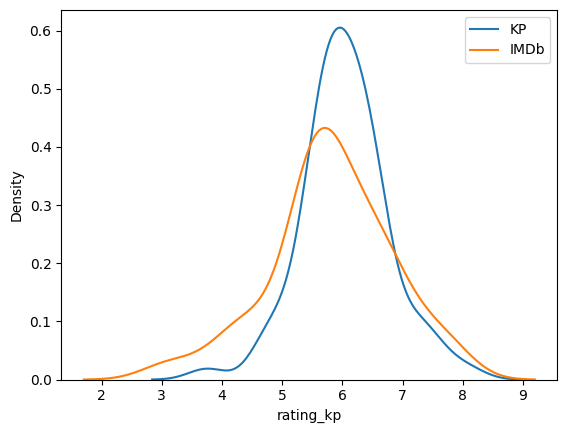

In [50]:
sns.kdeplot(films_df_cleaned['rating_kp'], label = 'KP')
sns.kdeplot(films_df_cleaned['rating_imdb'], label = 'IMDb')
plt.legend()

<Axes: xlabel='rating_kp', ylabel='rating_imdb'>

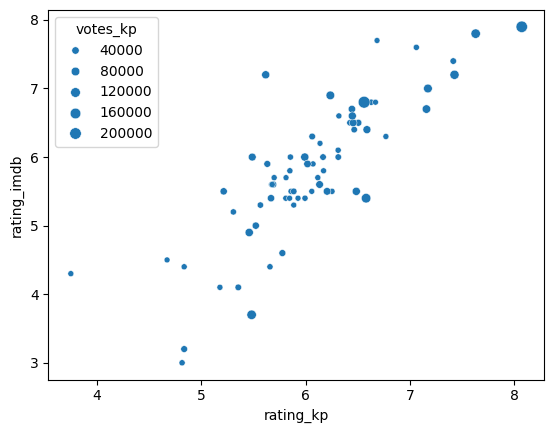

In [51]:
sns.scatterplot(data = films_df_cleaned, x = 'rating_kp', y = 'rating_imdb', size = 'votes_kp')

<Axes: >

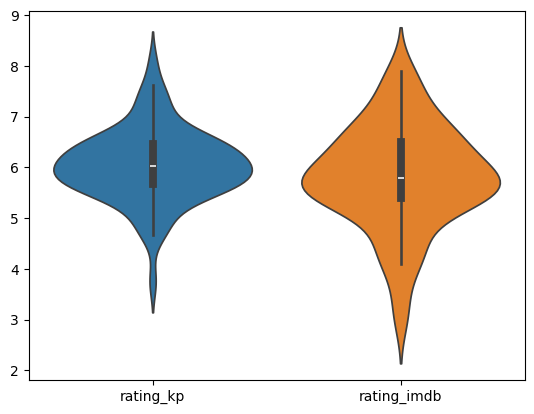

In [52]:
sns.violinplot(films_df_cleaned[['rating_kp', 'rating_imdb']])

### Задача 3: Популярность корейского кино

Исследовать рост популярности корейского кино за последнее десятилетие.

In [59]:
country = "Корея Южная"
years = "2013-2023"
page_id = 1

request = f'https://api.kinopoisk.dev/v1.4/movie?page={page_id}&limit=100&selectFields=id&selectFields=name&selectFields=alternativeName&selectFields=enName&selectFields=type&selectFields=year&selectFields=description&selectFields=shortDescription&selectFields=movieLength&selectFields=isSeries&selectFields=ticketsOnSale&selectFields=totalSeriesLength&selectFields=seriesLength&selectFields=ratingMpaa&selectFields=ageRating&selectFields=top10&selectFields=top250&selectFields=typeNumber&selectFields=status&selectFields=names&selectFields=logo&selectFields=poster&selectFields=backdrop&selectFields=rating&selectFields=votes&selectFields=genres&selectFields=countries&selectFields=releaseYears&type=movie&year={years}&countries.name={country}'

page = requests.get(request, headers ={'accept': 'application/json', 'X-API-KEY': API_key})
page

<Response [200]>

In [60]:
res = page.json()
res

{'docs': [{'id': 6431436,
   'name': 'Блуждания',
   'alternativeName': 'Mimang',
   'enName': None,
   'type': 'movie',
   'typeNumber': 1,
   'year': 2023,
   'description': 'Парень встречает свою бывшую девушку.',
   'shortDescription': None,
   'status': None,
   'rating': {'kp': 0,
    'imdb': 6.7,
    'filmCritics': 0,
    'russianFilmCritics': 0,
    'await': 0},
   'votes': {'kp': 3,
    'imdb': 66,
    'filmCritics': 0,
    'russianFilmCritics': 0,
    'await': 0},
   'movieLength': 92,
   'totalSeriesLength': None,
   'seriesLength': None,
   'ratingMpaa': None,
   'ageRating': None,
   'poster': {'url': 'https://image.openmoviedb.com/kinopoisk-images/10768063/ddadfe8f-348e-4fd8-b764-217129b117e2/orig',
    'previewUrl': 'https://image.openmoviedb.com/kinopoisk-images/10768063/ddadfe8f-348e-4fd8-b764-217129b117e2/x1000'},
   'genres': [{'name': 'драма'}],
   'countries': [{'name': 'Корея Южная'}],
   'top10': None,
   'top250': None,
   'isSeries': False,
   'ticketsOnSale': 

In [61]:
films_df = pd.DataFrame(res['docs'])
films_df.head(3)

,id,name,alternativeName,enName,type,typeNumber,year,description,shortDescription,status,...,poster,genres,countries,top10,top250,isSeries,ticketsOnSale,backdrop,names,logo
0,6431436,Блуждания,Mimang,None,movie,1,2023,Парень встречает свою бывшую девушку.,None,None,...,{'url': 'https://image.openmoviedb.com/kinopoi...,[{'name': 'драма'}],[{'name': 'Корея Южная'}],None,None,False,False,NaN,NaN,NaN
1,5444387,Кан Даниэль: Мой парад,Kang Daniel: My Parade,None,movie,1,2023,"Кан Даниэль, прославившийся в качестве участни...",None,None,...,{'url': 'https://image.openmoviedb.com/kinopoi...,"[{'name': 'концерт'}, {'name': 'музыка'}]",[{'name': 'Корея Южная'}],None,None,False,False,NaN,NaN,NaN
2,5379511,None,Caffeinated,None,movie,1,2015,None,None,None,...,NaN,"[{'name': 'документальный'}, {'name': 'новости...","[{'name': 'США'}, {'name': 'Колумбия'}, {'name...",None,None,False,False,NaN,NaN,NaN


In [62]:
page = pd.DataFrame(res['docs'])
films_df_cleaned = clean_page_columns(page)
films_df_cleaned = filter_noname_films(films_df_cleaned)
films_df_cleaned.head()

,name,rating_kp,rating_imdb,votes_kp,votes_imdb,year,genre_upd,countries_upd,top250
id,,,,,,,,,
1236015,Выкуп,7.454,6.6,30817,1434,2023,боевик,Корея Южная,None
1331187,Игра киллеров,6.433,5.8,9652,1092,2022,"боевик, криминал",Корея Южная,None
5025649,Реинкарнация. Картины с того света,5.642,5.1,6173,575,2022,ужасы,"Таиланд, Корея Южная",None
1272314,Побег из Могадишо,7.278,7.0,10929,7775,2021,"история, драма, военный, боевик",Корея Южная,None
4935012,Объект преследования,7.065,6.4,46325,3051,2023,"триллер, детектив, криминал",Корея Южная,None


In [63]:
from tqdm import tqdm

In [64]:
for i in range(2, res['pages'] + 1):
    country = "Корея Южная"
    years = "2013-2023"
    page_id = i

    request = f'https://api.kinopoisk.dev/v1.4/movie?page={page_id}&limit=100&selectFields=id&selectFields=name&selectFields=alternativeName&selectFields=enName&selectFields=type&selectFields=year&selectFields=description&selectFields=shortDescription&selectFields=movieLength&selectFields=isSeries&selectFields=ticketsOnSale&selectFields=totalSeriesLength&selectFields=seriesLength&selectFields=ratingMpaa&selectFields=ageRating&selectFields=top10&selectFields=top250&selectFields=typeNumber&selectFields=status&selectFields=names&selectFields=logo&selectFields=poster&selectFields=backdrop&selectFields=rating&selectFields=votes&selectFields=genres&selectFields=countries&selectFields=releaseYears&type=movie&year={years}&countries.name={country}'

    page = requests.get(request, headers ={'accept': 'application/json', 'X-API-KEY': API_key})

    res = page.json()

    page = pd.DataFrame(res['docs'])

    page_cleaned = clean_page_columns(page)
    page_cleaned = filter_noname_films(page_cleaned)

    films_df_cleaned = pd.concat([films_df_cleaned, page_cleaned])

<ipython-input-64-fa338a98b7a0>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  films_df_cleaned = pd.concat([films_df_cleaned, page_cleaned])
<ipython-input-64-fa338a98b7a0>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  films_df_cleaned = pd.concat([films_df_cleaned, page_cleaned])
<ipython-input-64-fa338a98b7a0>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns wh

In [66]:
films_df_cleaned.head()

,name,rating_kp,rating_imdb,votes_kp,votes_imdb,year,genre_upd,countries_upd,top250
id,,,,,,,,,
1236015,Выкуп,7.454,6.6,30817,1434,2023,боевик,Корея Южная,NaN
1331187,Игра киллеров,6.433,5.8,9652,1092,2022,"боевик, криминал",Корея Южная,NaN
5025649,Реинкарнация. Картины с того света,5.642,5.1,6173,575,2022,ужасы,"Таиланд, Корея Южная",NaN
1272314,Побег из Могадишо,7.278,7.0,10929,7775,2021,"история, драма, военный, боевик",Корея Южная,NaN
4935012,Объект преследования,7.065,6.4,46325,3051,2023,"триллер, детектив, криминал",Корея Южная,NaN


Сгруппируем по годам:

In [67]:
df_groupped_korea = films_df_cleaned.groupby('year')[['rating_kp', 'rating_imdb']].mean()
df_groupped_korea

,rating_kp,rating_imdb
year,,
2013,6.806833,6.606667
2014,6.862667,6.566667
2015,6.692633,6.503333
2016,6.828966,6.741379
2017,6.829257,6.748571
2018,6.780139,6.630556
2019,6.683053,6.594737
2020,6.771964,6.439286
2021,6.873458,6.520833


И, конечно, графики:

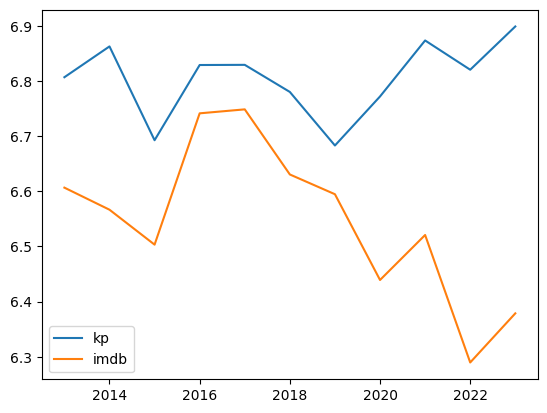

In [68]:
plt.plot(df_groupped_korea.index, df_groupped_korea['rating_kp'], label = 'kp')
plt.plot(df_groupped_korea.index, df_groupped_korea['rating_imdb'], label = 'imdb')

plt.legend()

plt.show()

### Задача 4: Фильмы с Тимоти Шаламе <3

Вывести самые высоко оценненые фильмы с Тимоти Шаламе за его карьеру

Найдем в интернете ID актера — Тимоти Шаламе:

In [73]:
actor_id = "1665224"
years = "2000-2025"
page_id = 1

request = f'https://api.kinopoisk.dev/v1.4/movie?page={page_id}&limit=100&selectFields=id&selectFields=name&selectFields=alternativeName&selectFields=enName&selectFields=type&selectFields=year&selectFields=description&selectFields=shortDescription&selectFields=movieLength&selectFields=isSeries&selectFields=ticketsOnSale&selectFields=totalSeriesLength&selectFields=seriesLength&selectFields=ratingMpaa&selectFields=ageRating&selectFields=top10&selectFields=top250&selectFields=typeNumber&selectFields=status&selectFields=names&selectFields=logo&selectFields=poster&selectFields=backdrop&selectFields=rating&selectFields=votes&selectFields=genres&selectFields=countries&selectFields=releaseYears&type=movie&year={years}&persons.id={actor_id}'

page = requests.get(request, headers ={'accept': 'application/json', 'X-API-KEY': API_key})
page

<Response [200]>

In [74]:
res = page.json()
res

{'docs': [{'id': 6290547,
   'name': 'Марти Превосходный',
   'alternativeName': 'Marty Supreme',
   'enName': None,
   'type': 'movie',
   'typeNumber': 1,
   'year': 2025,
   'description': None,
   'shortDescription': None,
   'status': 'completed',
   'rating': {'kp': 0,
    'imdb': 0,
    'filmCritics': 0,
    'russianFilmCritics': 0,
    'await': 0},
   'votes': {'kp': 0,
    'imdb': 0,
    'filmCritics': 0,
    'russianFilmCritics': 0,
    'await': 1657},
   'movieLength': None,
   'totalSeriesLength': None,
   'seriesLength': None,
   'ratingMpaa': None,
   'ageRating': None,
   'genres': [{'name': 'драма'},
    {'name': 'биография'},
    {'name': 'спорт'},
    {'name': 'комедия'}],
   'countries': [{'name': 'США'}, {'name': 'Финляндия'}],
   'top10': None,
   'top250': None,
   'isSeries': False,
   'ticketsOnSale': False},
  {'id': 462654,
   'name': 'Красивый мальчик',
   'alternativeName': 'Beautiful Boy',
   'enName': None,
   'names': [{'name': '뷰티풀 보이', 'language': 'KR',

In [75]:
films_df = pd.DataFrame(res['docs'])
films_df.head(3)

,id,name,alternativeName,enName,type,typeNumber,year,description,shortDescription,status,...,countries,top10,top250,isSeries,ticketsOnSale,names,poster,backdrop,logo,releaseYears
0,6290547,Марти Превосходный,Marty Supreme,None,movie,1,2025,None,None,completed,...,"[{'name': 'США'}, {'name': 'Финляндия'}]",None,NaN,False,False,NaN,NaN,NaN,NaN,NaN
1,462654,Красивый мальчик,Beautiful Boy,None,movie,1,2018,Реальная история молодого наркомана Ника Шеффа...,Отец спасает сына от наркозависимости. Глубока...,None,...,[{'name': 'США'}],None,NaN,False,False,"[{'name': '뷰티풀 보이', 'language': 'KR', 'type': ...",{'url': 'https://image.openmoviedb.com/kinopoi...,{'url': 'https://image.openmoviedb.com/tmdb-im...,{'url': 'https://image.openmoviedb.com/tmdb-im...,NaN
2,928993,Жаркие летние ночи,Hot Summer Nights,None,movie,1,2017,Одним летом обычный подросток Дэниэл знакомитс...,Влюбленный Дэниел продает наркотики на каникул...,None,...,[{'name': 'США'}],None,NaN,False,False,"[{'name': 'Chaudes nuits d'été', 'language': '...",{'url': 'https://image.openmoviedb.com/kinopoi...,{'url': 'https://image.openmoviedb.com/tmdb-im...,{'url': 'https://image.openmoviedb.com/tmdb-im...,NaN


In [77]:
films_df_cleaned = clean_page_columns(films_df)
films_df_cleaned = filter_noname_films(films_df_cleaned)
films_df_cleaned.head()

,name,rating_kp,rating_imdb,votes_kp,votes_imdb,year,genre_upd,countries_upd,top250
id,,,,,,,,,
462654,Красивый мальчик,7.318,7.4,44999,107196,2018,"драма, биография",США,NaN
928993,Жаркие летние ночи,6.767,6.4,48238,24764,2017,"драма, мелодрама, криминал",США,NaN
669958,Любите Куперов,6.575,5.8,76015,27167,2015,"фэнтези, мелодрама, комедия",США,NaN
963016,Недруги,7.432,7.2,153854,98799,2017,"драма, вестерн",США,NaN
1047626,Дождливый день в Нью-Йорке,7.207,6.5,165420,54370,2019,"мелодрама, комедия",США,NaN


In [79]:
df_shalame = films_df_cleaned.sort_values('rating_kp', ascending=False)
df_shalame.head(10)

,name,rating_kp,rating_imdb,votes_kp,votes_imdb,year,genre_upd,countries_upd,top250
id,,,,,,,,,
258687,Интерстеллар,8.640,8.7,980655,2127525,2014,"фантастика, драма, приключения","США, Великобритания, Канада",2.0
4540126,Дюна: Часть вторая,8.209,8.5,186362,595351,2024,"фантастика, боевик, драма, приключения","США, Канада, ОАЭ, Венгрия, Италия, Новая Зелан...",56.0
807339,Маленькие женщины,7.801,7.8,250753,259124,2019,"драма, мелодрама",США,NaN
409424,Дюна,7.674,8.0,803179,938473,2021,"фантастика, боевик, драма, приключения","США, Канада, Венгрия",NaN
979148,Назови меня своим именем,7.614,7.8,164245,320611,2017,"драма, мелодрама","Италия, Франция, США, Бразилия",NaN
1338480,Не смотрите наверх,7.489,7.2,291498,631247,2021,"драма, фантастика, комедия","США, Канада",NaN
1211076,Французский вестник. Приложение к газете «Либе...,7.483,7.1,79679,156941,2020,"драма, мелодрама, комедия","США, Германия, Канада, Франция, Великобритания...",NaN
963016,Недруги,7.432,7.2,153854,98799,2017,"драма, вестерн",США,NaN
462654,Красивый мальчик,7.318,7.4,44999,107196,2018,"драма, биография",США,NaN


### Задача 5: Самые длинные фантастические сериалы

Найти ТОП-10 самых длинных фантастических сериалов.

In [80]:
genres = ["фантастика", "фэнтези"]
page_id = 1

request = f'https://api.kinopoisk.dev/v1.4/movie?page={page_id}&limit=100&selectFields=id&selectFields=name&selectFields=alternativeName&selectFields=enName&selectFields=type&selectFields=year&selectFields=description&selectFields=shortDescription&selectFields=movieLength&selectFields=isSeries&selectFields=ticketsOnSale&selectFields=totalSeriesLength&selectFields=seriesLength&selectFields=ratingMpaa&selectFields=ageRating&selectFields=top10&selectFields=top250&selectFields=typeNumber&selectFields=status&selectFields=names&selectFields=logo&selectFields=poster&selectFields=backdrop&selectFields=rating&selectFields=votes&selectFields=genres&selectFields=countries&selectFields=releaseYears&type=tv-series&sortField=totalSeriesLength&sortType=-1&genres.name={genres[0]}&genres.name={genres[1]}'

page = requests.get(request, headers ={'accept': 'application/json', 'X-API-KEY': API_key})
page

<Response [200]>

In [81]:
res = page.json()
res

{'docs': [{'id': 419572,
   'type': 'tv-series',
   'name': 'Раузан',
   'rating': {'kp': 7.715,
    'imdb': 7.4,
    'filmCritics': 0,
    'russianFilmCritics': 0,
    'await': None},
   'description': 'Себастьян де Монтоза красив и богат, но страдает каталепсией - унаследованной от отца болезнью, от которой вскоре должен умереть. Молодой человек известен как загадочный, эксцентричный ловелас, который соблазняет самых красивых девушек, а потом безжалостно их бросает. \n\nНо в один прекрасный день он влюбляется в богатую красавицу Соледад де Сантино и решает на ней жениться... Но на его пути возникает сразу несколько препятствий. Во-первых, это его собственный брат, а во-вторых, девушка, которую он любил, и которая ждет от него ребенка, считает его мертвым, потому что после очередного приступа его похоронили заживо...',
   'votes': {'kp': 431,
    'imdb': 44,
    'filmCritics': 0,
    'russianFilmCritics': 0,
    'await': 0},
   'year': 2000,
   'poster': {'url': 'https://image.openmov

In [82]:
films_df = pd.DataFrame(res['docs'])
films_df.head(3)

,id,type,name,rating,description,votes,year,poster,genres,countries,...,ticketsOnSale,backdrop,logo,releaseYears,top10,top250,status,isSeries,seriesLength,totalSeriesLength
0,419572,tv-series,Раузан,"{'kp': 7.715, 'imdb': 7.4, 'filmCritics': 0, '...","Себастьян де Монтоза красив и богат, но страда...","{'kp': 431, 'imdb': 44, 'filmCritics': 0, 'rus...",2000,{'url': 'https://image.openmoviedb.com/kinopoi...,"[{'name': 'фэнтези'}, {'name': 'драма'}, {'nam...",[{'name': 'Колумбия'}],...,False,"{'url': None, 'previewUrl': None}","{'url': None, 'previewUrl': None}","[{'start': 2000, 'end': 2001}]",None,NaN,completed,True,45.0,4500
1,891645,tv-series,Министерство времени,"{'kp': 7.127, 'imdb': 8.2, 'filmCritics': 0, '...",Министерство времени - секретное правительстве...,"{'kp': 3372, 'imdb': 5736, 'filmCritics': 0, '...",2015,{'url': 'https://image.openmoviedb.com/kinopoi...,"[{'name': 'фантастика'}, {'name': 'фэнтези'}, ...",[{'name': 'Испания'}],...,False,"{'url': None, 'previewUrl': None}",{'url': 'https://image.openmoviedb.com/tmdb-im...,"[{'start': 2015, 'end': 2020}]",None,NaN,completed,True,NaN,3155
2,494493,tv-series,Королевство ветров,"{'kp': 8.083, 'imdb': 7.5, 'filmCritics': 0, '...","Король Юри, сын первого короля Когурё, великог...","{'kp': 1253, 'imdb': 1523, 'filmCritics': 0, '...",2008,{'url': 'https://image.openmoviedb.com/kinopoi...,"[{'name': 'фэнтези'}, {'name': 'драма'}, {'nam...",[{'name': 'Корея Южная'}],...,False,"{'url': None, 'previewUrl': None}","{'url': None, 'previewUrl': None}","[{'start': 2008, 'end': 2008}]",None,NaN,completed,True,60.0,2160


In [83]:
def clean_series(series):
    series['genre'] = series['genres'].apply(lambda genres: ', '.join([genre['name'] for genre in genres]))
    series['countries'] = series['countries'].apply(lambda countries: ', '.join([country['name'] for country in countries]))

    series['release_start'] = series['releaseYears'].apply(lambda x: x[0]['start'])
    series['release_end'] = series['releaseYears'].apply(lambda x: x[0]['end'])

    series.set_index('id', inplace = True)

    return series[['name', 'year', 'genre', 'countries', 'release_start', 'release_end', 'seriesLength', 'totalSeriesLength']]

Есть ли в топ-100 самых длинных сериалов сериалы из России?

In [84]:
cleaned100series = clean_series(films_df)
cleaned100series.head()

,name,year,genre,countries,release_start,release_end,seriesLength,totalSeriesLength
id,,,,,,,,
419572,Раузан,2000,"фэнтези, драма, мелодрама",Колумбия,2000.0,2001.0,45.0,4500
891645,Министерство времени,2015,"фантастика, фэнтези, боевик, триллер, комедия,...",Испания,2015.0,2020.0,NaN,3155
494493,Королевство ветров,2008,"фэнтези, драма, история",Корея Южная,2008.0,2008.0,60.0,2160
5028856,Сердце спасателя,2022,"ужасы, драма, мелодрама, комедия, фэнтези, дет...",Таиланд,2022.0,2022.0,39.0,1755
761595,Китайский паладин 3,2009,"фэнтези, боевик, история",Китай,2009.0,2009.0,45.0,1665


In [85]:
cleaned100series[cleaned100series['countries'].str.contains("Россия")]

,name,year,genre,countries,release_start,release_end,seriesLength,totalSeriesLength
id,,,,,,,,
717443,До смерти красива,2013,"фантастика, драма, комедия",Россия,2013.0,2013.0,46.0,1104
674374,Я отменяю смерть,2012,"детектив, триллер, фэнтези, мелодрама",Россия,2012.0,2012.0,45.0,1080
622652,Обратная сторона Луны,2012,"фантастика, триллер, драма, криминал, детектив",Россия,2012.0,2016.0,50.0,800
841702,Иные,2015,"фантастика, драма, триллер",Россия,2015.0,2015.0,48.0,768
533136,Шахта,2010,"фантастика, боевик, драма, детектив",Россия,2010.0,2010.0,48.0,768
256766,Охота на гения,2006,"фантастика, криминал, детектив, приключения",Россия,2006.0,2006.0,44.0,704
428836,Энигма,2010,"фантастика, триллер, приключения",Россия,2010.0,2010.0,47.0,686
487349,Гадание при свечах,2010,"фантастика, мелодрама",Россия,2010.0,2010.0,42.0,680
394028,Девять неизвестных,2006,"фэнтези, детектив",Россия,2006.0,2006.0,NaN,624


### Творческая часть

Придумайте какую-нибудь свою интересную и масштабную задачу, которую можно было бы решить в рамках имеющихся у нас данных. В идеале — сразу обосновать, какую пользу или интерес решение такой задачи могло бы нести.

Давайте вместе реализуем самые интересные и нетривиальные из ваших предложений!

    # your ideas here